In [2]:
#1

Found 491 images belonging to 5 classes.


D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step
Image: Akmal\aug_IMG_20200424_085729_0_3565.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20200805_083103_0_4449.jpg | Predicted: Almira (False) | True Label: Akmal
Image: Akmal\aug_IMG_20200821_161033_0_4289.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201101_092056_0_5210.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_131457_0_4694.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_131457_0_7540.jpg | Predicted: Laela (False) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_131735_0_2029.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_133054_0_5261.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201216_102116_0_4295.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\aug_IMG_20210314_123919_0_4004.jpg | Predicted: Almira (False) | True Label: Akmal
Image: Akm

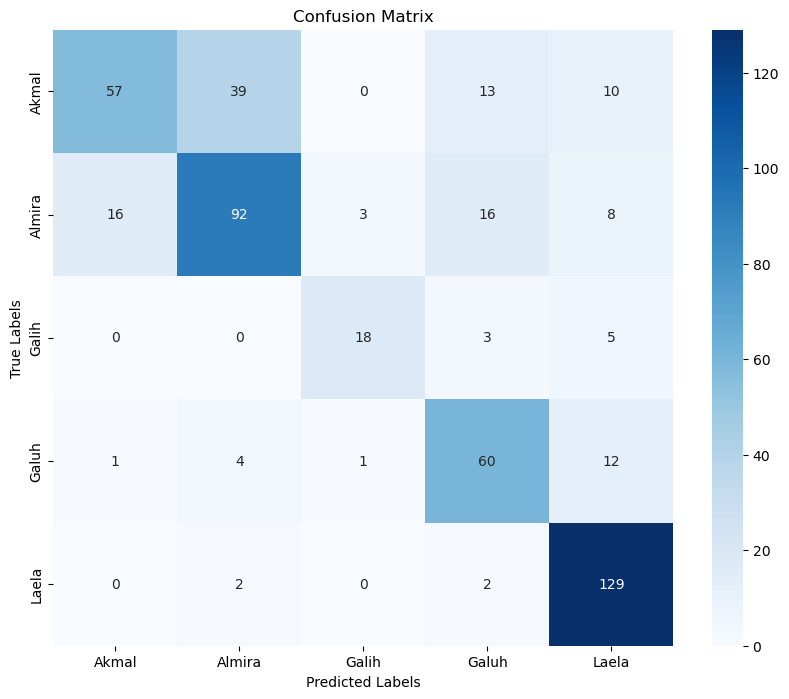


Classification Report:
              precision    recall  f1-score   support

       Akmal       0.77      0.48      0.59       119
      Almira       0.67      0.68      0.68       135
       Galih       0.82      0.69      0.75        26
       Galuh       0.64      0.77      0.70        78
       Laela       0.79      0.97      0.87       133

    accuracy                           0.73       491
   macro avg       0.74      0.72      0.72       491
weighted avg       0.73      0.73      0.72       491



In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Path ke direktori test
test_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\DATASET\test"
output_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\hasil_prediksi"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load model
model_path = "final_model.keras"
model = tf.keras.models.load_model(model_path)

# Generator dataset untuk test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Karena kita ingin satu gambar pada satu waktu
    class_mode='categorical',  # Klasifikasi multi-kelas
    shuffle=False  # Jangan shuffle untuk prediksi yang benar-benar sesuai klasifikasi
)

# Prediksi
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Mendapatkan label kelas terprediksi
true_labels = test_generator.classes  # Label sesungguhnya
class_labels = list(test_generator.class_indices.keys())  # Nama kelas

# Menampilkan hasil prediksi dan menyimpan gambar dengan label
for i, (image_path, prediction, true_label) in enumerate(zip(test_generator.filenames, predicted_classes, true_labels)):
    predicted_label = class_labels[prediction]
    true_label_name = class_labels[true_label]
    is_correct = predicted_label == true_label_name  # True jika klasifikasi benar, False jika salah
    print(f"Image: {image_path} | Predicted: {predicted_label} ({is_correct}) | True Label: {true_label_name}")
    
    # Load image
    img_path = os.path.join(test_dir, image_path)
    img = load_img(img_path, target_size=(224, 224))  # Load image
    img_array = img_to_array(img)  # Convert image to array
    
    # Save image with label and correctness status
    result_img_path = os.path.join(output_dir, f"{i}_{predicted_label}_{true_label_name}_correct_{is_correct}.jpg")
    plt.imsave(result_img_path, img_array / 255.0)  # Save image with the label and correctness status in the filename

# Optionally, create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))


Found 542 images belonging to 5 classes.


D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


542/542 ━━━━━━━━━━━━━━━━━━━━ 93s 170ms/step
Image: Akmal\IMG_20200424_085729.jpg | Predicted: Almira (False) | True Label: Akmal
Image: Akmal\IMG_20200805_083103.jpg | Predicted: Almira (False) | True Label: Akmal
Image: Akmal\IMG_20200821_161033.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\IMG_20200909_073434.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\IMG_20201101_092056.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\IMG_20201105_131457.jpg | Predicted: Laela (False) | True Label: Akmal
Image: Akmal\IMG_20201105_131735.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\IMG_20201105_133034.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\IMG_20201105_133054.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\IMG_20201216_102116.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\IMG_20201216_102919.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\IMG_20201216_103056.j

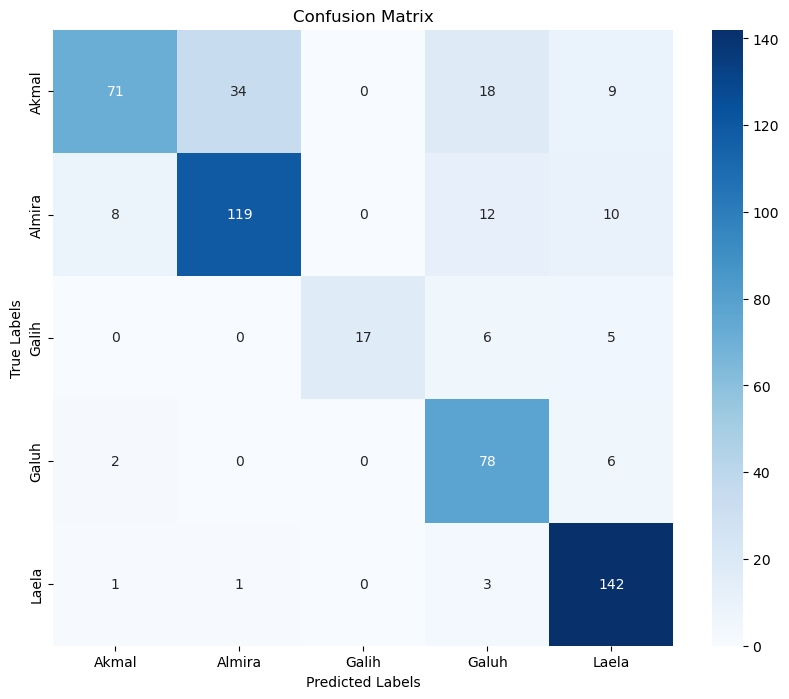


Classification Report:
              precision    recall  f1-score   support

       Akmal       0.87      0.54      0.66       132
      Almira       0.77      0.80      0.79       149
       Galih       1.00      0.61      0.76        28
       Galuh       0.67      0.91      0.77        86
       Laela       0.83      0.97      0.89       147

    accuracy                           0.79       542
   macro avg       0.83      0.76      0.77       542
weighted avg       0.80      0.79      0.78       542



In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Path ke direktori test
test_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\ORI"
output_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\hasil_prediksi_one"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load model
model_path = "final_model.keras"
model = tf.keras.models.load_model(model_path)

# Generator dataset untuk test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Karena kita ingin satu gambar pada satu waktu
    class_mode='categorical',  # Klasifikasi multi-kelas
    shuffle=False  # Jangan shuffle untuk prediksi yang benar-benar sesuai klasifikasi
)

# Prediksi
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Mendapatkan label kelas terprediksi
true_labels = test_generator.classes  # Label sesungguhnya
class_labels = list(test_generator.class_indices.keys())  # Nama kelas

# Menampilkan hasil prediksi dan menyimpan gambar dengan label
for i, (image_path, prediction, true_label) in enumerate(zip(test_generator.filenames, predicted_classes, true_labels)):
    predicted_label = class_labels[prediction]
    true_label_name = class_labels[true_label]
    is_correct = predicted_label == true_label_name  # True jika klasifikasi benar, False jika salah
    print(f"Image: {image_path} | Predicted: {predicted_label} ({is_correct}) | True Label: {true_label_name}")
    
    # Load image
    img_path = os.path.join(test_dir, image_path)
    img = load_img(img_path, target_size=(224, 224))  # Load image
    img_array = img_to_array(img)  # Convert image to array
    
    # Save image with label and correctness status
    result_img_path = os.path.join(output_dir, f"{i}_{predicted_label}_{true_label_name}_correct_{is_correct}.jpg")
    plt.imsave(result_img_path, img_array / 255.0)  # Save image with the label and correctness status in the filename

# Optionally, create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))


In [ ]:
#UAS

Found 491 images belonging to 5 classes.


D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step
Waktu eksekusi prediksi: 23.12 detik
Image: Akmal\aug_IMG_20200424_085729_0_3565.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20200805_083103_0_4449.jpg | Predicted: Almira (False) | True Label: Akmal
Image: Akmal\aug_IMG_20200821_161033_0_4289.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201101_092056_0_5210.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_131457_0_4694.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_131457_0_7540.jpg | Predicted: Laela (False) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_131735_0_2029.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201105_133054_0_5261.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Akmal\aug_IMG_20201216_102116_0_4295.jpg | Predicted: Galuh (False) | True Label: Akmal
Image: Akmal\aug_IMG_20210314_123919_0_4004.jpg | Predicted: Almira (

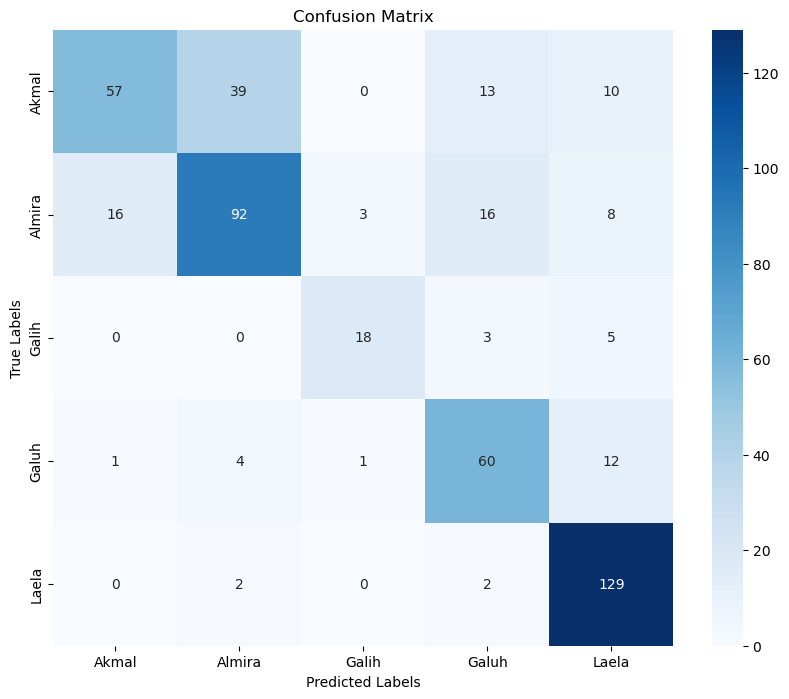


Classification Report:
              precision    recall  f1-score   support

       Akmal       0.77      0.48      0.59       119
      Almira       0.67      0.68      0.68       135
       Galih       0.82      0.69      0.75        26
       Galuh       0.64      0.77      0.70        78
       Laela       0.79      0.97      0.87       133

    accuracy                           0.73       491
   macro avg       0.74      0.72      0.72       491
weighted avg       0.73      0.73      0.72       491



In [1]:
import os
import time  # Untuk mencatat waktu eksekusi
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Path ke direktori test
test_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\DATASET\test"
output_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\hasil_prediksi_two"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load model
model_path = "final_model.keras"
model = tf.keras.models.load_model(model_path)

# Generator dataset untuk test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Karena kita ingin satu gambar pada satu waktu
    class_mode='categorical',  # Klasifikasi multi-kelas
    shuffle=False  # Jangan shuffle untuk prediksi yang benar-benar sesuai klasifikasi
)

# Catat waktu mulai prediksi
start_time = time.time()

# Prediksi
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Mendapatkan label kelas terprediksi
true_labels = test_generator.classes  # Label sesungguhnya
class_labels = list(test_generator.class_indices.keys())  # Nama kelas

# Catat waktu selesai prediksi
end_time = time.time()

# Hitung waktu eksekusi
execution_time = end_time - start_time
print(f"Waktu eksekusi prediksi: {execution_time:.2f} detik")

# Menampilkan hasil prediksi dan menyimpan gambar dengan label
for i, (image_path, prediction, true_label) in enumerate(zip(test_generator.filenames, predicted_classes, true_labels)):
    predicted_label = class_labels[prediction]
    true_label_name = class_labels[true_label]
    is_correct = predicted_label == true_label_name  # True jika klasifikasi benar, False jika salah
    print(f"Image: {image_path} | Predicted: {predicted_label} ({is_correct}) | True Label: {true_label_name}")
    
    # Load image
    img_path = os.path.join(test_dir, image_path)
    img = load_img(img_path, target_size=(224, 224))  # Load image
    img_array = img_to_array(img)  # Convert image to array
    
    # Save image with label and correctness status
    result_img_path = os.path.join(output_dir, f"{i}_{predicted_label}_{true_label_name}_correct_{is_correct}.jpg")
    plt.imsave(result_img_path, img_array / 255.0)  # Save image with the label and correctness status in the filename

# Optionally, create confusion matrix
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))


Found 5 images belonging to 5 classes.


D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Waktu eksekusi prediksi: 1.29 detik
Image: Akmal\aug_IMG_20200424_085729_0_3565.jpg | Predicted: Akmal (True) | True Label: Akmal
Image: Almira\aug_IMG_20201101_092041_0_2637.jpg | Predicted: Almira (True) | True Label: Almira
Image: Galih\aug_IMG_20220822_154120_0_579.jpg | Predicted: Galih (True) | True Label: Galih
Image: Galuh\aug_53f86da3068eced5e015ade164cb75c1_0 (2)_0_632.jpg | Predicted: Laela (False) | True Label: Galuh
Image: Laela\aug_1695874009206_0_2959.jpg | Predicted: Laela (True) | True Label: Laela


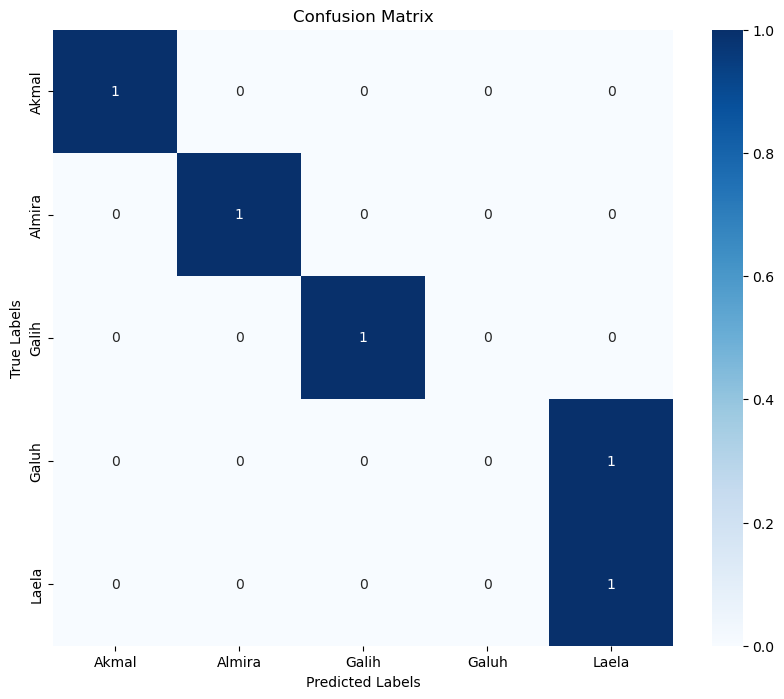


Classification Report:
              precision    recall  f1-score   support

       Akmal       1.00      1.00      1.00         1
      Almira       1.00      1.00      1.00         1
       Galih       1.00      1.00      1.00         1
       Galuh       0.00      0.00      0.00         1
       Laela       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5



D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import os
import time  # Untuk mencatat waktu eksekusi
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Path ke direktori test
test_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\test"
output_dir = r"D:\KULIAH\SEMESTER 5\PENGHLIHATAN DAN ANALISIS CITRA\DATASET\Klasifikasi\hasil_prediksi_two"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load model
model_path = "final_model.keras"
model = tf.keras.models.load_model(model_path)

# Generator dataset untuk test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Karena kita ingin satu gambar pada satu waktu
    class_mode='categorical',  # Klasifikasi multi-kelas
    shuffle=False  # Jangan shuffle untuk prediksi yang benar-benar sesuai klasifikasi
)

# Catat waktu mulai prediksi
start_time = time.time()

# Prediksi
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Mendapatkan label kelas terprediksi
true_labels = test_generator.classes  # Label sesungguhnya
class_labels = list(test_generator.class_indices.keys())  # Nama kelas

# Catat waktu selesai prediksi
end_time = time.time()

# Hitung waktu eksekusi
execution_time = end_time - start_time
print(f"Waktu eksekusi prediksi: {execution_time:.2f} detik")

# Menampilkan hasil prediksi dan menyimpan gambar dengan label
for i, (image_path, prediction, true_label) in enumerate(zip(test_generator.filenames, predicted_classes, true_labels)):
    predicted_label = class_labels[prediction]
    true_label_name = class_labels[true_label]
    is_correct = predicted_label == true_label_name  # True jika klasifikasi benar, False jika salah
    print(f"Image: {image_path} | Predicted: {predicted_label} ({is_correct}) | True Label: {true_label_name}")
    
    # Load image
    img_path = os.path.join(test_dir, image_path)
    img = load_img(img_path, target_size=(224, 224))  # Load image
    img_array = img_to_array(img)  # Convert image to array
    
    # Save image with label and correctness status
    result_img_path = os.path.join(output_dir, f"{i}_{predicted_label}_{true_label_name}_correct_{is_correct}.jpg")
    plt.imsave(result_img_path, img_array / 255.0)  # Save image with the label and correctness status in the filename

# Optionally, create confusion matrix
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))
